<a href="https://www.kaggle.com/code/hassaneskikri/binary-prediction-of-poisonous-mushrooms?scriptVersionId=192922337" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style ="font-family:Trebuchet MS; background-color : #f8f0fa; border-left: 5px solid #1b4332; padding: 12px; border-radius: 50px 50px;">
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;"><b> Binary Prediction of Poisonous Mushrooms Season 4, Episode 8
 </b></h2>
    <hr style="border-top: 2px solid #264653;">
    <h3 style="font-size: 14px; color: #264653; text-align: left; "><strong> I hope this is very helpful. Thank you for your time.😊🌟</strong></h3>
    <h2></h2>
</div>

<h1 style="background-color: #12f7ff;
           font-family: 'Trebuchet MS', sans-serif;
           color: #000;
           font-size: 150%;
           text-align: center;
           border-radius: 50px 50px;
           padding: 20px 20px ;
           margin: 30px 30px;
           box-shadow: 0 0 10px rgba(18,247,255,0.6),
    0 0 20px rgba(18,247,255,0.6),
    0 0 30px rgba(18,247,255,0.6),
    0 0 40px rgba(18,247,255,0.6);">
    🔻🌟 1. Overview🌟🔻
</h1>

<p style="font-size:16px;
          background-color:#333;
          border-radius:7px;
          margin: 2px auto;
          padding: 10px;">In this project, we tackle a classic machine learning challenge: predicting whether a mushroom is edible or poisonous based on its physical characteristics. This task is part of the 2024 Kaggle Playground Series, designed to help participants practice and refine their machine learning skills with approachable yet intriguing datasets.<p>

The primary goal is to classify mushrooms into two categories:

- Edible (e)
- Poisonous (p)

<div style="display: block;
            height: auto;
            width:60%;
            padding: 40px auto;
            margin: 20px auto;">
    <img src="https://www.worldatlas.com/r/w2000-h1125-q90/upload/f2/39/71/shutterstock-508167682.jpg" style="border-radius: 50px 50px;">
</div>


<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">2. About the Dataset</span></h1>

<p style="font-size:16px;
          background-color:#333;
          border-radius:7px;
          margin: 2px auto;
          padding: 10px;">The dataset includes a mix of features that describe the mushrooms' physical characteristics. These features were generated from a deep learning model trained on the well-known UCI Mushroom dataset. While the feature distributions are similar to the original dataset, there are differences that add complexity to the challenge.<p>

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">3. importing liberaries</span></h1>

In [1]:
import h2o
!pip show h2o

Name: h2o
Version: 3.46.0.3
Summary: H2O, Fast Scalable Machine Learning, for python 
Home-page: https://github.com/h2oai/h2o-3.git
Author: H2O.ai
Author-email: support@h2o.ai
License: Apache v2
Location: /opt/conda/lib/python3.10/site-packages
Requires: requests, tabulate
Required-by: 


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# for model accuracy
from sklearn.metrics import accuracy_score

# for scaling
from sklearn.preprocessing import StandardScaler

# for spling
from sklearn.model_selection import train_test_split, cross_val_score

#for hyperparameter 
import optuna

# imputer the numerical columns
from sklearn.impute import KNNImputer

#impyter for categorical columns
from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from h2o.automl import H2OAutoML

import warnings
warnings.filterwarnings("ignore")

In [3]:
#initilize the h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp72qqry2n
  JVM stdout: /tmp/tmp72qqry2n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp72qqry2n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_cijxsg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.250 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">4. Load the data</span></h1>

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

In [5]:
id = test['id']

In [6]:
train['class'] = train['class'].map({'e':1,'p':0})
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,1,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,0,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,1,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,1,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,1,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [7]:
print('the shape of the train dataset is :', train.shape)
print('the shape of the test dataset is :', test.shape)

the shape of the train dataset is : (3116945, 22)
the shape of the test dataset is : (2077964, 21)


In [8]:
# first' let's remove the id column
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 499.4+ MB
None


In [10]:
nunique = train.nunique()
print("\nnunique value in dataset \n",nunique)


nunique value in dataset 
 class                      2
cap-diameter            3913
cap-shape                 74
cap-surface               83
cap-color                 78
does-bruise-or-bleed      26
gill-attachment           78
gill-spacing              48
gill-color                63
stem-height             2749
stem-width              5836
stem-root                 38
stem-surface              60
stem-color                59
veil-type                 22
veil-color                24
has-ring                  23
ring-type                 40
spore-print-color         32
habitat                   52
season                     4
dtype: int64


<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">5. Data Analysing and preprocessing</span></h1>

class
0    1705396
1    1411549
Name: count, dtype: int64


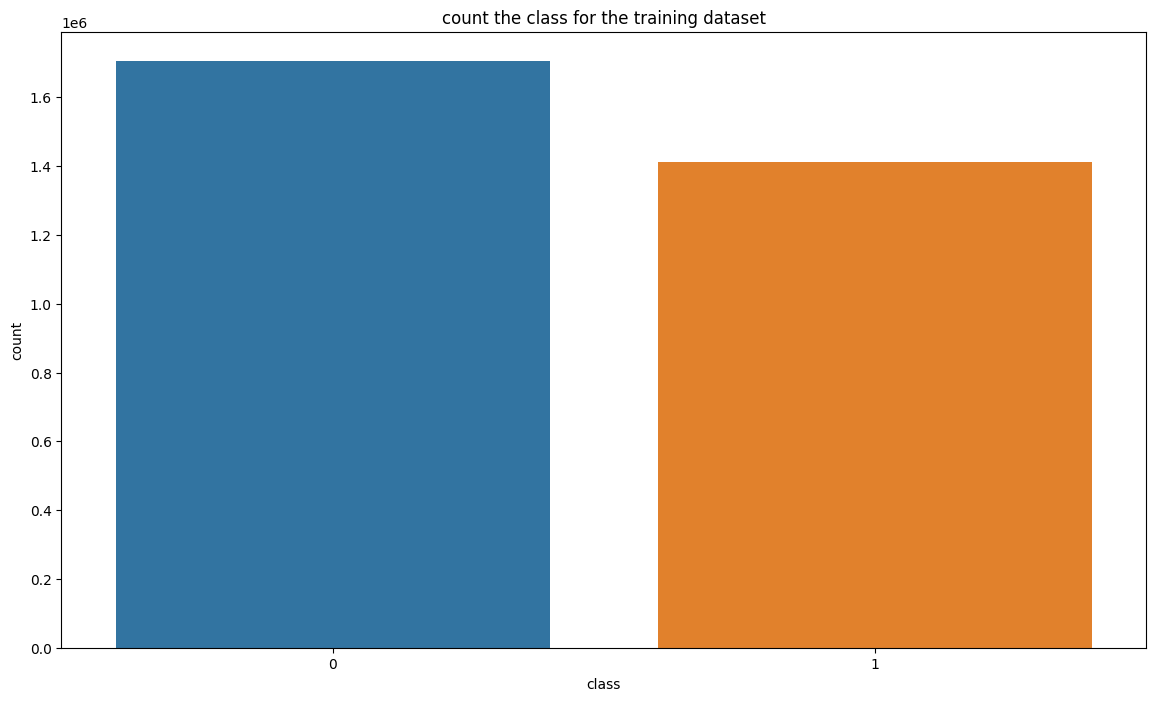

In [11]:
print(train['class'].value_counts())
plt.figure(figsize=(14,8))
sns.countplot(data = train, x=train['class'])
plt.title('count the class for the training dataset')
plt.show()

In [12]:
train.isnull().sum()

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [13]:
col = train.columns[train.isnull().mean() > 0.8].tolist()
col

['stem-root', 'veil-type', 'veil-color', 'spore-print-color']

In [14]:
# if a column has a very high percentage(>80%) of missing values consider of the dropping it.
train = train.drop(columns = col)
test = test.drop(columns = col)

In [15]:
#handling the numerical features
numerical_col = [i for i in train.columns if train[i].dtype=='float64']
numerical_col

['cap-diameter', 'stem-height', 'stem-width']

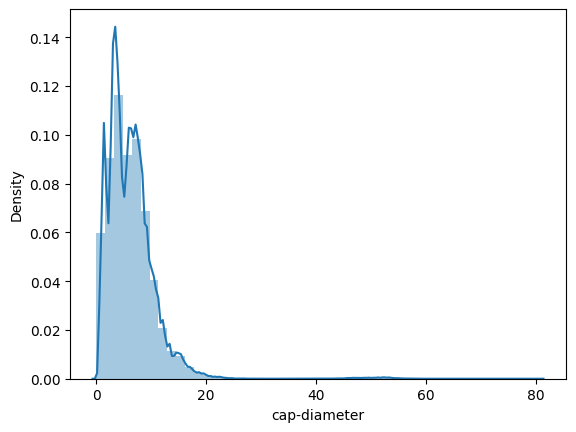

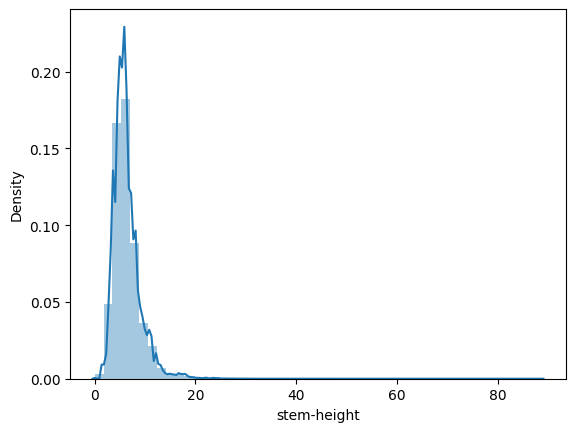

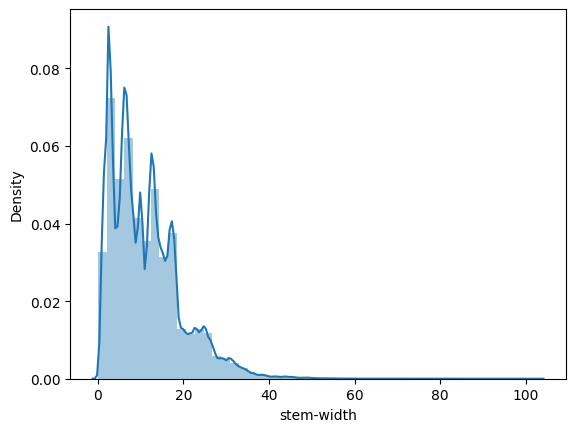

In [16]:
for i in numerical_col:
    sns.distplot(train[i])
    plt.show()

In [17]:
imputer = KNNImputer(n_neighbors = 5)
train[numerical_col] = imputer.fit_transform(train[numerical_col])
test[numerical_col] = imputer.transform(test[numerical_col])

In [18]:
# handling the categorical columns
cat_cols = train.select_dtypes(include=['object']).columns
cat_cols

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

In [19]:
train.nunique()

class                      2
cap-diameter            3917
cap-shape                 74
cap-surface               83
cap-color                 78
does-bruise-or-bleed      26
gill-attachment           78
gill-spacing              48
gill-color                63
stem-height             2749
stem-width              5836
stem-surface              60
stem-color                59
has-ring                  23
ring-type                 40
habitat                   52
season                     4
dtype: int64

In [20]:
imputer = SimpleImputer(strategy= 'most_frequent')
train[cat_cols] = imputer.fit_transform(train[cat_cols])
test[cat_cols] = imputer.transform(test[cat_cols])

In [21]:
train.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [22]:
test.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">6. Pipeline</span></h1>

In [23]:
one_hot_encoded_features = ['season', 'has-ring','does-bruise-or-bleed']
frequency_encoded_features = [col for col in cat_cols if col not in one_hot_encoded_features]

In [24]:
freq = train['season'].value_counts()
freq

season
a    1543321
u    1153588
w     278189
s     141847
Name: count, dtype: int64

In [25]:
# Create the Frequency Encoding Transformer

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns=None, default_value= 0):
        self.columns = columns
        self.encoding = {}
        self.default_value = default_value #to handele the unseen categories in the test data because in the train we do fit and transform but in the test just transform
        
    def fit(self, X, y=None):
        for col in self.columns:
            freq = X[col].value_counts(normalize=True)
            self.encoding[col] = freq
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
           # Map the known categories and fill unseen categories with the most frequent value
            X_copy[col] = X_copy[col].map(self.encoding[col]).fillna(self.default_value)
            
            # Ensure the transformed column is of float type
            X_copy[col] = X_copy[col].astype('float64')
        return X_copy


In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(),numerical_col),
        ('freq', FrequencyEncoder(columns=frequency_encoded_features),frequency_encoded_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False), one_hot_encoded_features)
    ]
)

In [27]:
train_df = train.drop(columns=['class'])

In [28]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor)
])

train_preprocessed = pipeline.fit_transform(train_df)
test_preprocessed = pipeline.transform(test)

In [29]:
# convert the numpy array into a df

#create feature names for FrequencyEncoder
freq_feature_names = frequency_encoded_features 

# Get feature names for the OneHotEncoder
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_encoded_features)

# Combine all feature names
feature_names = numerical_col + list(freq_feature_names) + list(onehot_feature_names)

In [30]:
train_preprocessed_df = pd.DataFrame(train_preprocessed, columns=feature_names)
test_preprocessed_df = pd.DataFrame(test_preprocessed, columns=feature_names)

# Ensure the DataFrame has the same index as the original data
train_preprocessed_df.index = train.index
train_preprocessed_df['class'] = train['class']
test_preprocessed_df.index = test.index

train_preprocessed_df.head()

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,gill-color,stem-surface,...,does-bruise-or-bleed_p,does-bruise-or-bleed_r,does-bruise-or-bleed_s,does-bruise-or-bleed_t,does-bruise-or-bleed_u,does-bruise-or-bleed_w,does-bruise-or-bleed_x,does-bruise-or-bleed_y,does-bruise-or-bleed_z,class
0,0.534605,-0.680926,0.523282,0.216955,0.123509,0.023476,0.375358,0.830778,0.298881,0.740620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.386405,-0.577213,-0.577333,0.460729,0.091262,0.057379,0.375358,0.830778,0.174333,0.081971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.135286,0.185819,-0.151169,0.216955,0.123509,0.019671,0.115779,0.830778,0.298881,0.740620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.521659,-0.810568,-0.571157,0.216955,0.105175,0.067638,0.094785,0.830778,0.068068,0.740620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.098724,-1.103187,-0.345105,0.460729,0.014392,0.121735,0.189043,0.830778,0.298881,0.740620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
train_preprocessed_df.isnull().sum()

cap-diameter              0
stem-height               0
stem-width                0
cap-shape                 0
cap-surface               0
                         ..
does-bruise-or-bleed_w    0
does-bruise-or-bleed_x    0
does-bruise-or-bleed_y    0
does-bruise-or-bleed_z    0
class                     0
Length: 67, dtype: int64

In [32]:
test_preprocessed_df.isnull().sum()

cap-diameter              0
stem-height               0
stem-width                0
cap-shape                 0
cap-surface               0
                         ..
does-bruise-or-bleed_u    0
does-bruise-or-bleed_w    0
does-bruise-or-bleed_x    0
does-bruise-or-bleed_y    0
does-bruise-or-bleed_z    0
Length: 66, dtype: int64

In [33]:
print('Transformed train data shape:', train_preprocessed_df.shape)
print('Transformed test data shape:', test_preprocessed_df.shape)

Transformed train data shape: (3116945, 67)
Transformed test data shape: (2077964, 66)


<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">7. Correlation & handeling outliers</span></h1>

In [34]:
corr = train_preprocessed_df[train_preprocessed_df.columns].corr()['class'].sort_values(ascending=False)
corr = corr.to_frame()
corr.style.background_gradient(cmap='RdYlBu')

,class
class,1.000000
stem-surface,0.175727
stem-width,0.169807
cap-diameter,0.162626
stem-color,0.150315
season_w,0.126487
cap-color,0.102532
gill-color,0.093026
cap-shape,0.084173
season_s,0.069676


In [35]:
best_columns = [
    "stem-width",
    "stem-color",
    "cap-diameter",
    "gill-color",
    "cap-surface",
    "gill-attachment",
    "stem-height",
    "cap-shape",
    "cap-color",
    "habitat",
    "does-bruise-or-bleed_t",
    "does-bruise-or-bleed_f",
    "season_a",
    "season_u"
]

In [36]:
train_final = train_preprocessed_df[best_columns]
train_final['class'] = train['class']
test_final = test_preprocessed_df[best_columns]

In [37]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   stem-width              float64
 1   stem-color              float64
 2   cap-diameter            float64
 3   gill-color              float64
 4   cap-surface             float64
 5   gill-attachment         float64
 6   stem-height             float64
 7   cap-shape               float64
 8   cap-color               float64
 9   habitat                 float64
 10  does-bruise-or-bleed_t  float64
 11  does-bruise-or-bleed_f  float64
 12  season_a                float64
 13  season_u                float64
 14  class                   int64  
dtypes: float64(14), int64(1)
memory usage: 356.7 MB


In [38]:
target = 'class'
features = train_final.columns.drop(target)

In [39]:
# Function to remove outliers using IQR
def remove_outliers(train, columns):
    for column in columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    return train

# Remove outliers from the specified columns
train_preprocessed_df = remove_outliers(train_final,best_columns)

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">8. Modeling</span></h1>

In [40]:
X = train_final.drop(columns = ['class'])
y = train_final[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# train a random forest model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_train_pred = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

train Accuracy: 1.0000
Test Accuracy: 0.9881


In [43]:
# # train a K neighrest neighbord model 
# kn = KNeighborsClassifier()
# kn.fit(X_train, y_train)

In [44]:
# y_train_pred = kn.predict(X_train)
# accuracy_train = accuracy_score(y_train, y_train_pred)

# y_test_pred = kn.predict(X_test)
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print(f"train Accuracy: {accuracy_train:.4f}")
# print(f"Test Accuracy: {accuracy_test:.4f}")

In [45]:
# # Get the feature importance
# feature_importances = pd.Series(rf.feature_importances_, index=best_columns).sort_values(ascending =False)

# #plot them

# plt.figure(figsize=(14,8))
# sns.barplot(x=feature_importances, y = feature_importances.index)
# plt.title('Feature importances')
# plt.xlabel("Importance")
# plt.ylabel("features")
# plt.show()

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">9. using H2O Auto ML</span></h1>

In [46]:
#Convert to H2OFrame
X = train_final
train, test = train_test_split(X,test_size=0.2, random_state=42)

train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [47]:
#initilize automl
aml = H2OAutoML(max_runtime_secs=500,
               balance_classes=True,
               max_models =20,
               seed =10,
               verbosity='info',
               nfolds=2)

In [48]:
target = 'class'

In [49]:
# fitting the model
aml.train(x=best_columns, y=target, training_frame = train_h2o)

AutoML progress: |
01:29:45.52: Project: AutoML_1_20240817_12945
01:29:45.53: Setting stopping tolerance adaptively based on the training frame: 0.001
01:29:45.54: Build control seed: 10
01:29:45.54: training frame: Frame key: AutoML_1_20240817_12945_training_Key_Frame__upload_b2ff9d971e3173584d6267c3f8f8434a.hex    cols: 15    rows: 2493556  chunks: 130    size: 96545621  checksum: -3985244165547518956
01:29:45.55: validation frame: NULL
01:29:45.55: leaderboard frame: NULL
01:29:45.55: blending frame: NULL
01:29:45.55: response column: class
01:29:45.55: fold column: null
01:29:45.56: weights column: null
01:29:45.81: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), gr

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20240817_12945


Model Summary: 
    number_of_trees
--  -----------------
    47

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.009585050859760856
RMSE: 0.09790327297777565
MAE: 0.027715732352267326
RMSLE: 0.0689893171610803
Mean Residual Deviance: 0.009585050859760856

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.01202830505598324
RMSE: 0.10967362972010747
MAE: 0.03346659059641646
RMSLE: 0.07726763894700876
Mean Residual Deviance: 0.01202830505598324

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
aic                     nan        0            nan           nan
loglikelihood           nan        0            nan           nan
mae                     0.0334666  2.89409e-05  0.0334871     0.0334461
mean_residual_deviance  0.0120283  7.2466e-05   0.0120795     0.0119771
mse                     0.0120283  7.2466e-05   0.0120795     0.0119771
r2                      0.951455   0.000295717  0.951246      0.951664
residual_deviance       0.0120283  7.2466e-05   0.0120795     0.0119771
rmse                    0.109673   0.000330372  0.109907      0.10944
rmsle                   0.0772675  0.000214031  0.0774188     0.0771161

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2024-08-17 01:34:17  4 min 32.361 sec  0                  0.5              0.5             0.25
    2024-08-17 01:34:20  4 min 35.337 sec  5                  0.145872         0.113677        0.0212786
    2024-08-17 01:34:22  4 min 37.851 sec  10                 0.10631          0.0402539       0.0113018
    2024-08-17 01:34:26  4 min 41.400 sec  15                 0.101134         0.0291586       0.010228
    2024-08-17 01:34:30  4 min 45.388 sec  20                 0.100199         0.0281282       0.0100399
    2024-08-17 01:34:35  4 min 50.293 sec  25                 0.0993937        0.0277395       0.00987911
    2024-08-17 01:34:41  4 min 56.306 sec  30                 0.0989088        0.0277308       0.00978294
    2024-08-17 01:34:48  5 min  3.065 sec  35                 0.0986113        0.0277229       0.00972419
    2024-08-17 01:34:55  5 min 10.804 sec  40                 0.0984122        0.0277332       0.00968495
    2024-08-17 01:35:04  5 min 19.531 sec  45                 0.0981357        0.0277548       0.00963061
    2024-08-17 01:35:15  5 min 29.956 sec  47                 0.0979033        0.0277157       0.00958505

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
stem-width              124209                 1                    0.176631
cap-surface             103322                 0.831839             0.146928
gill-color              92685.4                0.746207             0.131803
gill-attachment         90847.5                0.731411             0.12919
cap-color               84662.7                0.681616             0.120394
cap-diameter            60209.2                0.484742             0.0856204
stem-color              41845.3                0.336895             0.0595061
habitat                 33597.6                0.270493             0.0477774
does-bruise-or-bleed_t  22428.7                0.180572             0.0318946
cap-shape               19145.2                0.154138             0.0272255
does-bruise-or-bleed_f  14948.2                0.120347             0.021257
stem-height             12834.4                0.103329             0.0182511
season_a                1449.31                0.0116683       

In [50]:
# to view all the models that been used :
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_1_AutoML_1_20240817_12945,0.109674,0.0120283,0.0334666,0.0772676,0.0120283
GLM_1_AutoML_1_20240817_12945,0.4724,0.223162,0.446578,0.331813,0.223162


In [51]:
best_model = aml.leader


# evaluate performance on test data
perf = best_model.model_performance(test_h2o)

print(perf)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.011416994228309208
RMSE: 0.10685033564902456
MAE: 0.030275987285425247
RMSLE: 0.07514039464168891
Mean Residual Deviance: 0.011416994228309208


In [52]:
# predict on test data 
predictions = best_model.predict(test_h2o)

# convert to pandas train
pred_train = predictions.as_data_frame()
print(pred_train.head())

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
    predict
0  0.010516
1  0.453887
2  0.999286
3  0.001743
4 -0.004032


In [53]:
pred_train['predict'] = pred_train['predict'].apply(lambda x: 1 if x>0.5 else 0)
print(pred_train['predict'].head())

0    0
1    0
2    1
3    0
4    0
Name: predict, dtype: int64


In [54]:
actual_train = test[target]
actual_train.head(5)

1356763    0
2369311    0
1146527    1
889383     0
416134     0
Name: class, dtype: int64

In [55]:
accuracy = accuracy_score(actual_train, pred_train['predict'])
print(f"Accuracy of the best model:{accuracy:.4f}")

Accuracy of the best model:0.9876


In [56]:
import joblib

# Save the model
joblib.dump(rf, 'best_model.pkl')

['best_model.pkl']

<h1 style="font-size: 21px;
           text-align:left;
           padding: 10px;
           display: inline-bock;
           width: 100%;
           box-sizing: border-box;
           "><span style = "border-bottom: 4px solid #333;
                            padding-bottom: 10px;
                            display: inline-block;">4. Prediction</span></h1>

In [57]:
y_predection = rf.predict(test_final)
submission = pd.DataFrame({'id': id , "class": y_predection})
submission.to_csv("submission.csv", index=False)


<img style="width: 50%; height: auto; padding: 20px  auto; margin: 20px auto; display: block ; display: block; border-radius: 50px 50px;" src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaWFsMmxudnF2dm84aGs5NW9lcW9zaXdvM3N6eW55YzY4cjc5bm94MiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/smaaKxR6ZrQYQxHFfA/giphy.gif">
